In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

import os

C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import cartopy.crs as ccrs

In [3]:
#os.chdir("C:/Users/tamee/Downloads/Zg/MPI/zg/")
ds1 = xr.open_dataset('zg_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc')
hgt = ds1.zg.sel(lat=slice(-10,90), lon=slice(180.5, 360),plev=slice(6) ,time=slice('2010-01-01','2014-12-31'))
lat_zg = ds1.lat.sel(lat=slice(-10,90))
lon_zg = ds1.lon.sel(lon=slice(180.5, 360))

C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [6]:
#os.chdir("C:/Users/tamee/Downloads/Zg/MPI/zg/")
a= pd.read_csv("z_anom_mpi.csv")
a = a.drop(a.columns[0], axis=1)
a

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20428,V20429,V20430,V20431,V20432,V20433,V20434,V20435,V20436,V20437
0,-2.120141,-2.093388,-2.068688,-2.049421,-2.039528,-2.032170,-2.013562,-2.018999,-2.016498,-1.997844,...,0.279674,0.344931,0.422241,0.502929,0.576216,0.637003,0.694471,0.753100,0.805506,0.845974
1,-0.446767,-0.517177,-0.580196,-0.639303,-0.678193,-0.725027,-0.764526,-0.790730,-0.819828,-0.830231,...,0.926635,1.063807,1.174933,1.244401,1.270201,1.247580,1.178554,1.067770,0.915323,0.728842
2,-0.801158,-0.728383,-0.681952,-0.648062,-0.611047,-0.592321,-0.594600,-0.586049,-0.572480,-0.573367,...,-0.509685,-0.514444,-0.543226,-0.586799,-0.631624,-0.662133,-0.674642,-0.673073,-0.667579,-0.662102
3,0.048043,0.063780,0.088061,0.081875,0.074364,0.062274,0.056999,0.043292,0.039618,0.042993,...,-0.719048,-0.798922,-0.865628,-0.923673,-0.978393,-1.039614,-1.105553,-1.154205,-1.185184,-1.208442
4,-0.657300,-0.586258,-0.548338,-0.536065,-0.523069,-0.528109,-0.537834,-0.544068,-0.540836,-0.543159,...,0.720129,0.712799,0.730637,0.780231,0.868740,0.996619,1.153049,1.320039,1.484700,1.646198
5,1.086188,1.139250,1.173837,1.216753,1.251745,1.267235,1.276815,1.296004,1.293771,1.296728,...,0.099318,0.127358,0.146702,0.173950,0.221245,0.283436,0.357375,0.446246,0.559841,0.689288
6,-0.342265,-0.438848,-0.511421,-0.580602,-0.628531,-0.677566,-0.702176,-0.725986,-0.745867,-0.754617,...,1.782150,1.700470,1.612332,1.504785,1.365996,1.201405,1.029810,0.857804,0.685399,0.518790
7,-0.973481,-1.040568,-1.073611,-1.112076,-1.124779,-1.133940,-1.145137,-1.139452,-1.149563,-1.149387,...,-1.213960,-1.163899,-1.114524,-1.070655,-1.039408,-1.022175,-1.021155,-1.038378,-1.061511,-1.080009
8,-1.617689,-1.590194,-1.569838,-1.541428,-1.511659,-1.489807,-1.471960,-1.441714,-1.426683,-1.416571,...,-0.161914,-0.048039,0.080094,0.211221,0.325143,0.411185,0.480434,0.543090,0.603907,0.668844
9,-0.939284,-0.919205,-0.919384,-0.894604,-0.893581,-0.877276,-0.851257,-0.843346,-0.836680,-0.824602,...,0.273042,0.213103,0.140910,0.064751,-0.007300,-0.065640,-0.108639,-0.139805,-0.164158,-0.183961


In [7]:
hgt2d = hgt.values
ntime,nlevel, nrow_zg, ncol_zg = hgt2d.shape
print(nrow_zg,ncol_zg)

107 191


In [8]:
os.chdir('C:/Users/tamee/Downloads/')

b1= pd.read_csv('SAI_s6_8mpi.csv')
#b1= (b1 - b1.mean())/b1.std()
b1=np.mean(b1,axis=1)

In [104]:
#os.chdir('C:/Users/tamee/Downloads/Zg/MPI/pr/precip/')
#b=pd.read_csv("precip_mpi_anom.csv")
#b = b.drop(columns=["Unnamed: 0"])
#b=np.mean(b,axis=1)

In [9]:
#a= pd.read_csv("z_anom_mpi.csv")

a_t=a.T

In [14]:
from scipy import signal

In [15]:
a_zg = PCA(n_components=9)
a_zg.fit(a_t)
a_reduced= a_zg.transform(a_t)
a_reduced= signal.detrend(a_reduced, axis=0, type='linear')
zg_f=a_zg.inverse_transform(a_reduced)
print(a_zg.explained_variance_ratio_.sum())

0.814549918435933


In [41]:
eofs = a_zg.components_
eofs_updated = signal.detrend(eofs, axis=0, type='linear')
year= np.arange(1, 37)   # [1 2 3 ... 36]

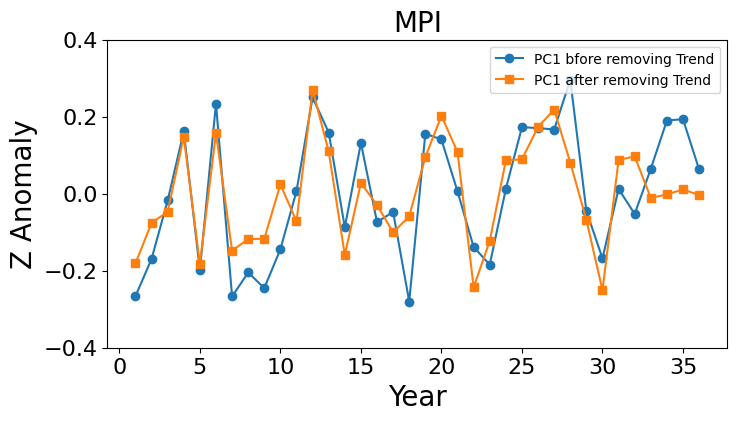

In [48]:
plt.figure(figsize=(8,4))
plt.plot(year, eofs[0], marker='o', label='PC1 bfore removing Trend')
plt.plot(year, eofs_updated[0], marker='s', label='PC1 after removing Trend')
plt.xlabel("Year",fontsize =20)
plt.ylim(-0.4,0.4)
plt.ylabel("Z Anomaly",fontsize=20)
plt.title("MPI",fontsize=20)
plt.legend()
plt.legend(loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=16) 
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('ts_mpi.png',dpi=300, bbox_inches="tight")

In [16]:
rp= np.reshape(zg_f,(nrow_zg,ncol_zg,36),order='F')
range(rp.shape[0])

range(0, 107)

In [17]:
cor_mpi= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_mpi[:] = np.nan
cor_mpi_p= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_mpi_p[:] = np.nan

In [18]:
import scipy.stats

In [19]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_mpi[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[0]
        
        
        

In [20]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_mpi_p[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[1]
        

In [21]:
mpi_sign= np.zeros([36,63])

In [22]:
for i in range(mpi_sign.shape[0]):
    for j in range(mpi_sign.shape[1]):
        if cor_mpi_p[i,j]<0.1:
            mpi_sign[i,j]= mpi_sign[i,j]+1
        else:
            mpi_sign[i,j]= mpi_sign[i,j]+0

In [23]:
y,x=np.where(mpi_sign>0)

In [24]:
x_list1= x.tolist()
y_list1=y.tolist()
lat_np= lat_zg.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon_zg.to_numpy()
lon_ls= lon_np.tolist()

In [25]:
lat_list1= []
for values in list(range(len(y_list1))):
    lat_list1.append(lat_ls[y_list1[values]])
    

In [26]:
lat_list1

[]

In [27]:
lon_list1= []
for values in list(range(len(x_list1))):
    lon_list1.append(lon_ls[x_list1[values]])

In [28]:
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap

In [31]:
def to_float(arr):
    # fast path if already numeric
    if isinstance(arr, np.ndarray) and np.issubdtype(arr.dtype, np.number):
        return arr.astype(np.float64, copy=False)
    # attempt robust conversion (handles lists / mixed types)
    return np.array(arr, dtype=np.float64)

In [32]:
cor_mpi= to_float(cor_mpi)

In [29]:
pip install basemap-data-hires

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\tamee\AppData\Local\Temp\ipykernel_10956\1576840745.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  m.plot(lon_list1,lat_list1,'bo',markersize=2,color='k')


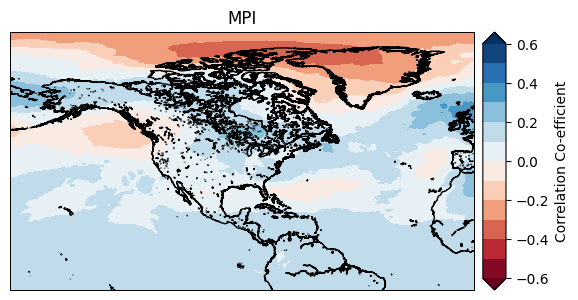

In [34]:
m = Basemap(projection='cyl', llcrnrlon=min(lon_zg), llcrnrlat=min(lat_zg),
        urcrnrlon=max(lon_zg), urcrnrlat=max(lat_zg),resolution='h')

x, y = m(*np.meshgrid(lon_zg,lat_zg))

cs = m.contourf(x,y,cor_mpi,np.arange(-0.6,0.7,0.1), cmap='RdBu',extend='both')
m.plot(lon_list1,lat_list1,'bo',markersize=2,color='k')
m.drawcoastlines()
#m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',linewidth=0.7)
circle.set_clip_on(False)
cb.set_label('Correlation Co-efficient')
plt.title('MPI')
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('PCA_MPI_trend_removed.png')

In [35]:
os.chdir("C:/Users/tamee/Downloads/review figures/")
np.savetxt("cor_mpi.txt", cor_mpi, fmt="%.2f", delimiter="\t")

In [59]:
b2d_pcs =  b

NameError: name 'b' is not defined

In [31]:
os.chdir('C:/Users/tamee/Downloads/new_runs/MPI/HR')

In [ ]:
m = Basemap(projection='cyl', llcrnrlon=min(lon_zg), llcrnrlat=min(lat_zg),
        urcrnrlon=max(lon_zg), urcrnrlat=max(lat_zg),resolution='h')

x, y = m(*np.meshgrid(lon_zg,lat_zg))

cs = m.contourf(x,y,cor_mpi,np.arange(-0.6,0.7,0.1), cmap='RdBu',extend='both')
m.plot(lon_list1,lat_list1,'bo',markersize=2,color='k')
m.drawcoastlines()
#m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',linewidth=0.7)
circle.set_clip_on(False)
cb.set_label('Correlation Co-efficient')
plt.title('MPI JJA (1979-2014)')

In [60]:
np.max(cor_mpi)

0.2815958815958816

In [36]:
from scipy.interpolate import RegularGridInterpolator
os.chdir("C:/Users/tamee/Downloads/")
ds1 = xr.open_dataset('hgt.mon.mean.nc')
hgt = ds1.hgt.sel(lat=slice(90,-7.5), lon=slice(182.5, 360),level=slice(6) ,time=slice('1979-01-01','2014-12-31'))
lat_cpc = ds1.lat.sel(lat=slice(90, -7.5))
lon_cpc = ds1.lon.sel(lon=slice(182.5, 360))

In [37]:
os.chdir("C:/Users/tamee/Downloads/review figures/")


cpc = np.loadtxt("cor_cpc.txt")  


In [38]:
fA = RegularGridInterpolator((lat_zg, lon_zg), cor_mpi, bounds_error=False, fill_value=np.nan)
LATB, LONB = np.meshgrid(lat_cpc, lon_cpc, indexing='ij')  # (nlatB, nlonB)
pts = np.column_stack((LATB.ravel(), LONB.ravel()))
A_on_B = fA(pts).reshape(LATB.shape)

In [39]:
mask = np.isfinite(A_on_B) & np.isfinite(cpc)
r = np.corrcoef(A_on_B[mask].ravel(), cpc[mask].ravel())[0, 1]

In [40]:
r

-0.31676121916586264